In [1]:
#import relevant libraries
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import dabest
from struct import *
import osar
import scipy as sp
import re
import dabest
import warnings
from datetime import datetime

date = datetime.today().strftime('%Y%m%d')
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)


## __COMPUTER TYPE__


In [50]:
#typeo = "C:\\Users\\user\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
#typeo = "C:\\Users\\lnico\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
typeo = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
genot = "Chrimson2"
typeob = typeo + genot + "\\"

## __RUN ONLY IF YOU HAVE NEW DATA__


In [34]:
#nicole's data (only run if no comp set)
root = typeob
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x )', (os.path.split(dir1)[1])).group(0))
    #basegenotype.append(re.search(r'^.*?(?=-Gal4)', (os.path.split(dir1)[1])).group(0))
        
        
dfs=[]
for loc,name in zip(baseDirectory,basegenotype):
    dfs.append(osar.osar(loc,driver = name).results)

Creating borders for each fly...
Done.

Processing CSV 35 of 35
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 71 of 71
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 56 of 56
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 57 of 57
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 52 of 52
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 65 of 65
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 84 of 84
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 68 of 68
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 79 of 79
Summarising results for all flies...
All done.
C

In [35]:
df=pd.concat(dfs)
filepath = typeo + genot + "compilation_full.csv"
df.to_csv(filepath)
#df.to_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACRcompilation_full.csv')

## __RUN THIS IF OLD DATA SET__

In [51]:
filepath = typeo + genot + "compilation_full.csv"
df2= pd.read_csv(filepath)

basegenotype = df2['driver'].unique()

In [52]:
basegenotype = ['SS46438', 'SS67662', 'SS75200', 'SS77450', 'SS81353', 'SS81521', 'VT999036']

In [53]:
def meandiffchart(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfr1, idx=titlelst, ci=90)
    tab1 = test.mean_diff.statistical_tests
    tab1['difference'] = round(tab1['difference'],3)
    tab = pd.concat([tab1['test'], tab1['difference']], axis=1)
    tab.rename(columns = {'test':'MBON', 'difference':parameter}, inplace = True)

    return tab

In [54]:
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

#parameter = 'pi_smoothed_Pattern 01'
parameter = 'log2_speed_ratio_Pattern 01'

if parameter == 'log2_speed_ratio_Pattern 01':
    yaxi = 'Log2 Speed Ratio'
else:
    yaxi = 'PI'

In [55]:
dfr1 = pd.DataFrame()
for names in basegenotype:
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)
    
    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    dfr1 = pd.concat([dfr1, dfrr], axis = 1)
    
l = dfr1.columns.tolist()
titlelst = list(zip(l,l[1:]))[::2]    

c:\Users\user\anaconda3\lib\site-packages\dabest\plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


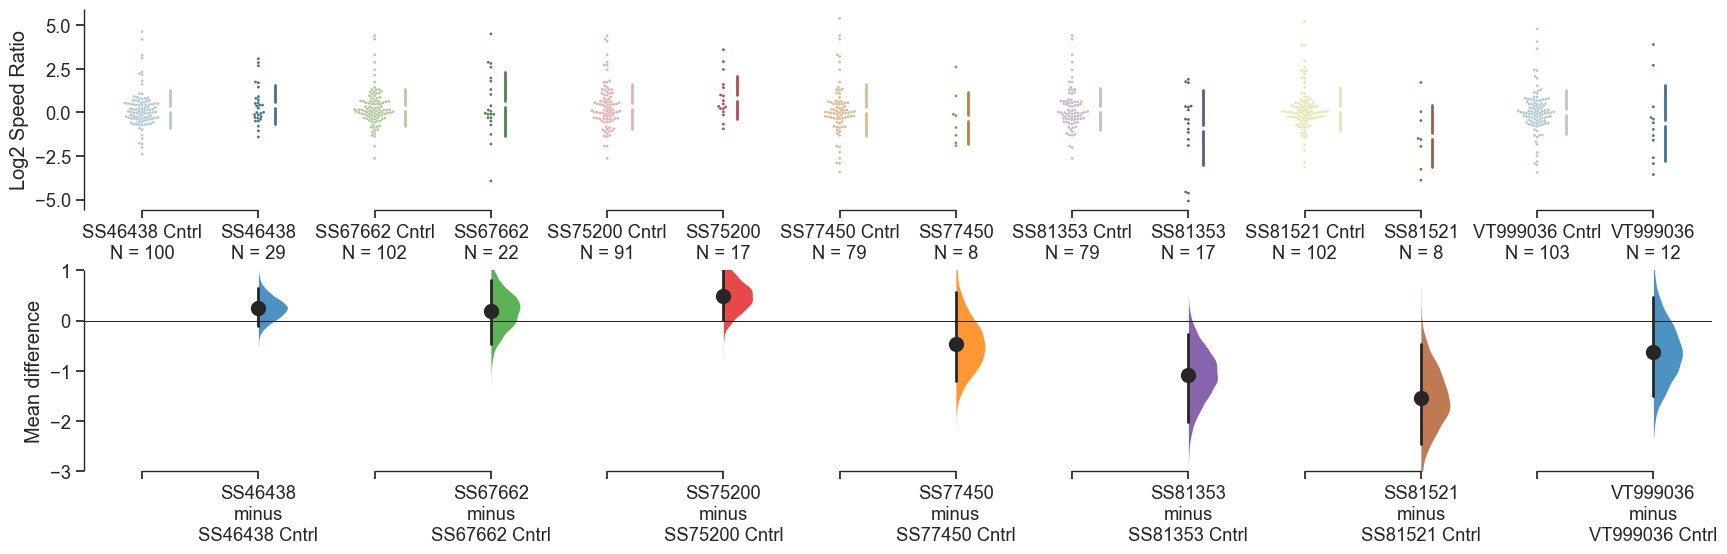

In [56]:
test = dabest.load(dfr1, idx=titlelst, ci=90)
compilationplt = test.mean_diff.plot(float_contrast=False, raw_marker_size=2, es_marker_size=10, custom_palette="Paired", swarm_label=yaxi, contrast_ylim=(-3,1));
sns.set(font_scale=1.2,  style='ticks')
compilationplt;

In [36]:
filename = typeo + 'compilation_' + genot + '_valence_Full_light'
compilationplt.savefig(filename + '.png', bbox_inches="tight", dpi=300)

# __Regression plot__

In [12]:
#import plotly.express as px
import seaborn as sns
df= df2
dfi=df2[(df2['light_intensity']=='Half')|(df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)
nama = ['VT999036',"MB112C", "MB323B", 'MB093C', "R76", "MB434B"]
dfx = pd.DataFrame()

for each in nama:
    dfy = dfi[(dfi['MBON'] == each)]
    dfx = pd.concat([dfx, dfy])

In [15]:
valencemd = meandiffchart(dfi, basegenotype, 'pi_smoothed_Pattern 01')
srmd = meandiffchart(dfi, basegenotype, 'log2_speed_ratio_Pattern 01')

totalmd = pd.DataFrame()
totalmd = pd.concat([valencemd,srmd.iloc[:,1]], axis = 1)
totalmd.rename(columns = {'pi_smoothed_Pattern 01':'PI MeanDiff', 'log2_speed_ratio_Pattern 01':'Speed Ratio MeanDiff'}, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_15484\3193222713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab1['difference'] = round(tab1['difference'],3)
C:\Users\user\AppData\Local\Temp\ipykernel_15484\3193222713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab1['difference'] = round(tab1['difference'],3)


In [31]:
reglst=[]

for name in totalmd['MBON'].tolist():

    dfo=dfi[dfi['MBON']==name]
    x = dfo['log2_speed_ratio_Pattern 01'].to_numpy()
    y = dfo['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)

    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    r2 = np.round(corr.rvalue**2, 3)
    
    reglst.append(r2)

reg = pd.DataFrame()
reg['MBON']=totalmd['MBON'].tolist()
reg["Regression value"] = reglst


totalmdt = pd.DataFrame()
totalmdt = pd.concat([totalmd, reg["Regression value"]], axis=1)
totalmdt.set_index('MBON', inplace = True)

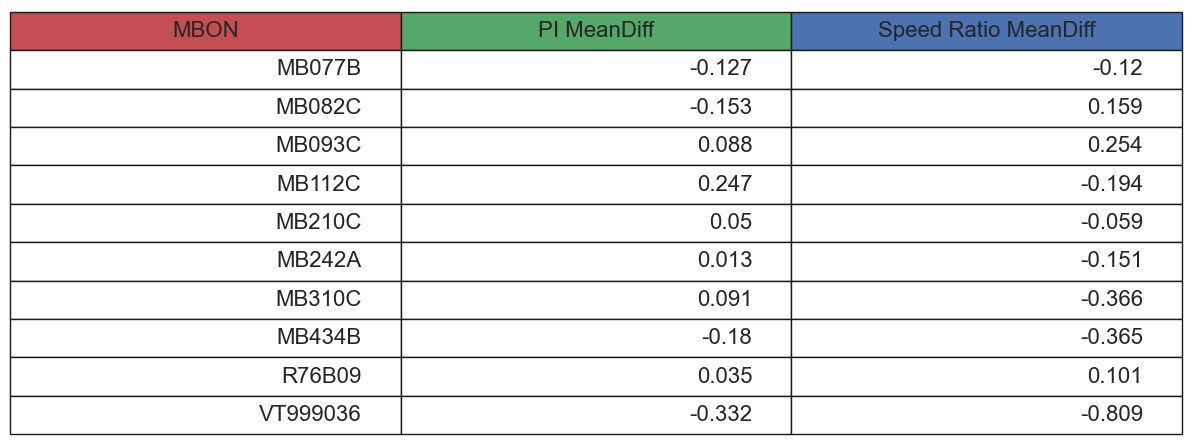

In [25]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

tablele = ax.table(cellText=totalmd.values, colLabels=totalmd.columns, colColours = 'rgba(128,128,128,0.3)', loc='center')

fig.tight_layout()
tablele.scale(2, 2)
tablele.set_fontsize(16)

plt.show()


## Single Lin regression

c:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 0, 'Absolute PI Mean Diff')

<Figure size 2000x2000 with 0 Axes>

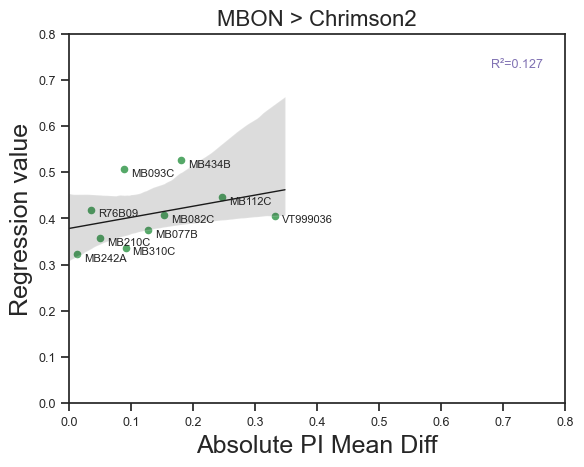

In [28]:
totalmdtabs = totalmdt.copy().reset_index(drop=False)
totalmdtabs['PI MeanDiff'] = abs(totalmdtabs['PI MeanDiff'])

plt_1 = plt.figure(figsize=(20, 20), dpi = 100)

plt_1= totalmdtabs.plot(kind = 'scatter', x= 'PI MeanDiff', y = 'Regression value', color = "g");

sns.regplot(x = totalmdtabs['PI MeanDiff'],
                y = totalmdtabs['Regression value'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                truncate=False)

x = totalmdtabs['PI MeanDiff'].to_numpy()
y = totalmdtabs['Regression value'].to_numpy()

finiteMask = np.isfinite([x, y]).all(axis=0)

corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                        statfunction=r2_and_slope, 
                        n_samples=3000)

r2 = np.round(corr.rvalue**2, 3)
r2_lower = np.round(lowers[0], 3)
r2_upper = np.round(uppers[0], 3)

plt_1.annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                        xy=(0.85, 0.90),  # xy coords
                        xycoords='axes fraction',
                        ha='left', va='bottom', color = "m",
                        fontsize=9)


for idx, row in totalmdtabs.iterrows():
    plt_1.annotate(row['MBON' ], (row['PI MeanDiff'], row['Regression value']), xytext=(5,-5),
                textcoords='offset points', family='sans-serif', fontsize=8)
plt_1.set_xlim(0, 0.8)
plt_1.set_ylim(0, 0.8)
plt_1.tick_params(axis='x', labelsize=9)
plt_1.tick_params(axis='y', labelsize=9)
plt_1.set_title("MBON > " + genot, fontsize = 16)
plt_1.set_xlabel('Absolute PI Mean Diff')

## Total regression plot

In [29]:
import seaborn as sns

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

nama = basegenotype

dfx = pd.DataFrame()

for each in nama:
    dfy = dfi[(dfi['MBON'] == each)]
    dfx = pd.concat([dfx, dfy])
    
osar_data = dfx

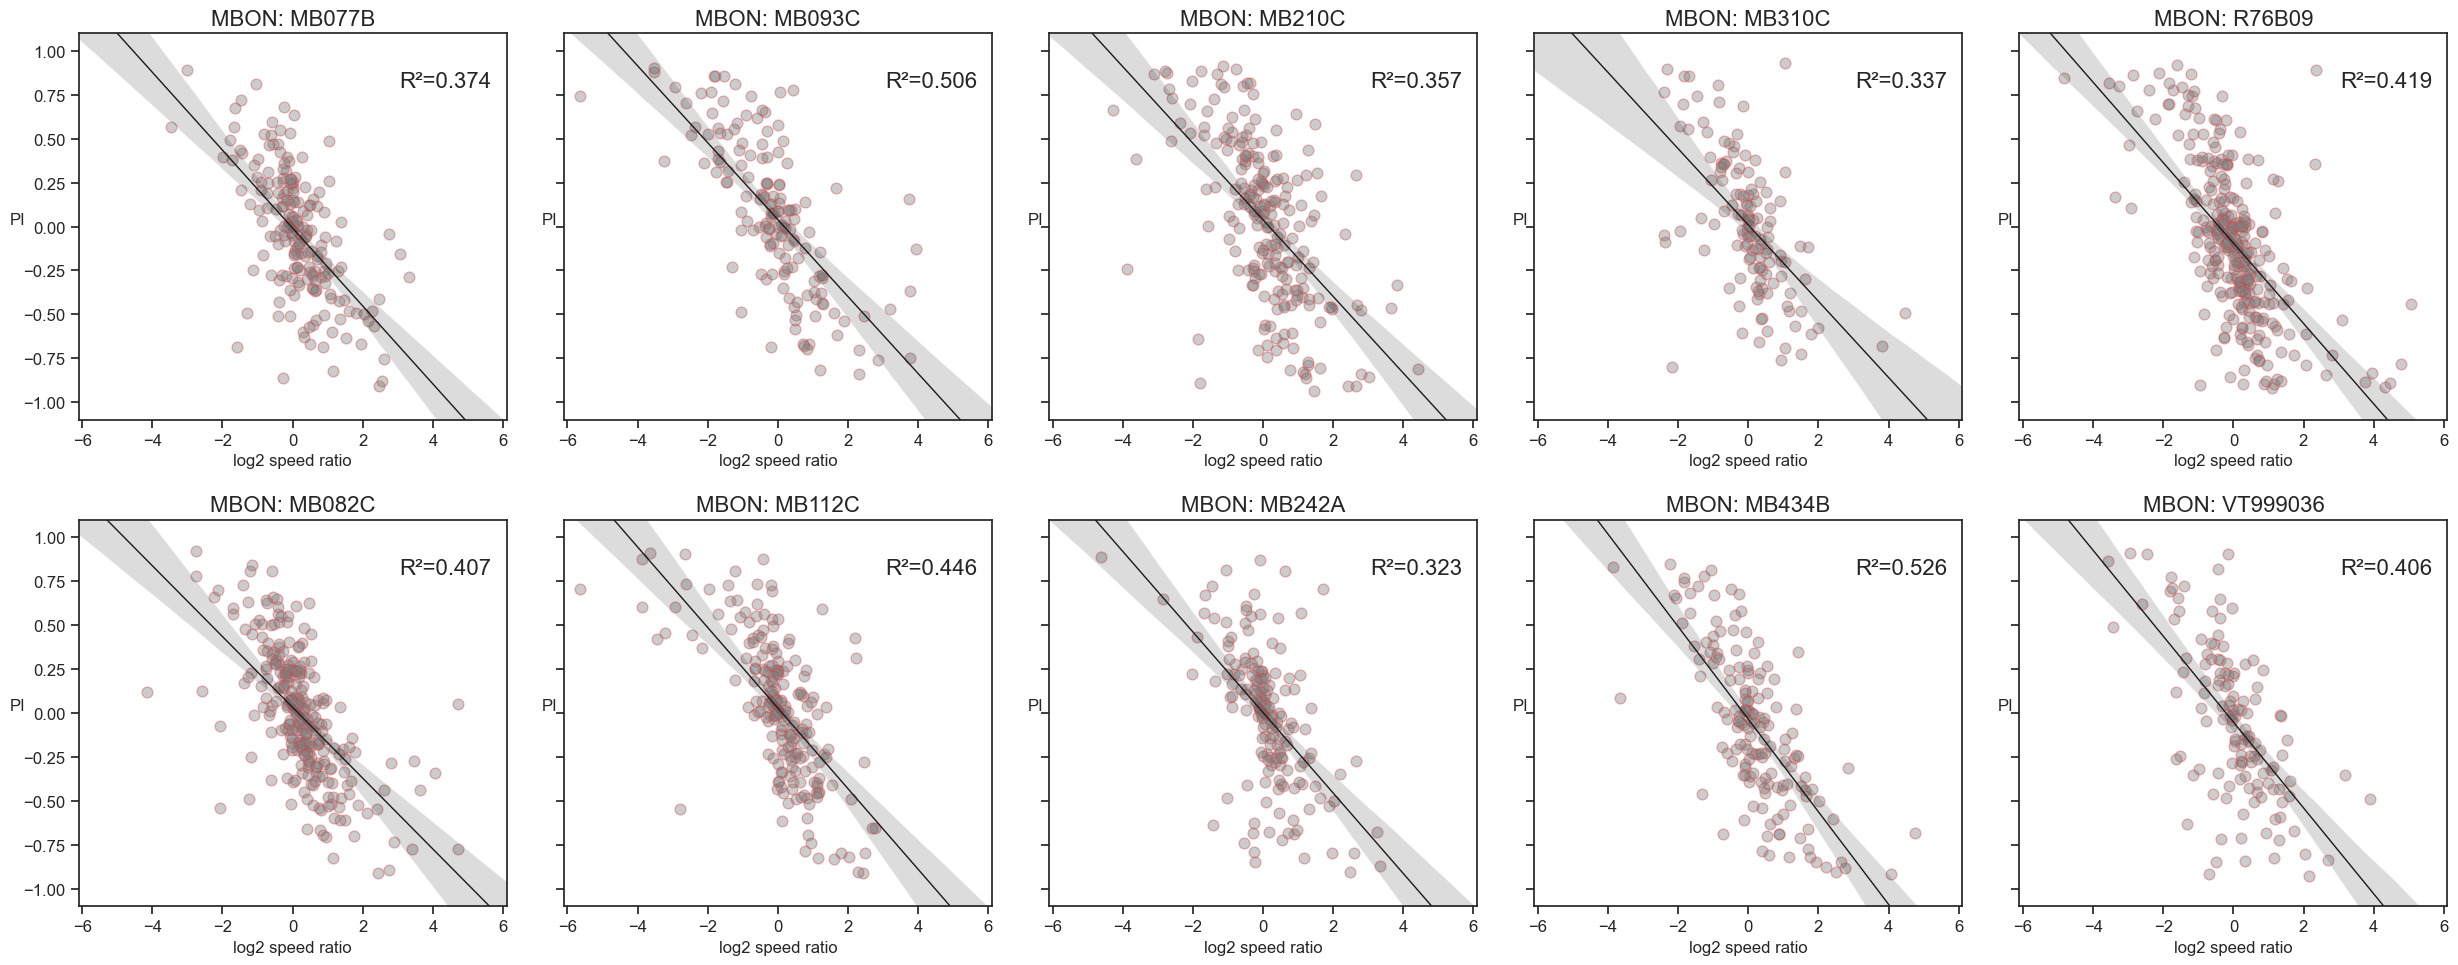

In [30]:
f, ax = plt.subplots(nrows=2, ncols=5,figsize=(25,10), sharey = True)  #ACR

for name, row, col in zip(basegenotype, 5*[0,1], 2*[0]+2*[1]+2*[2]+2*[3]+2*[4]+2*[5]): #ACR

    df=osar_data[osar_data['MBON']==name]

    ax[row][col].set_ylim(-1.1,1.1)  
    ax[row][col].set_xlim(-6.1,6.1) 
    ax[row][col].tick_params(axis='x', labelsize= 12)
    ax[row][col].tick_params(axis='y', labelsize= 12)

    ax[row][col].scatter(df['log2_speed_ratio_Pattern 01'], 
            df['pi_smoothed_Pattern 01'],
            color='grey',
            edgecolors="r",
            alpha=0.4, 
            s=60)

                    
    sns.regplot(x = df['log2_speed_ratio_Pattern 01'],
                    y = df['pi_smoothed_Pattern 01'],
                    scatter=False,
                    line_kws={'lw':1}, 
                    color="k",
                    ax=ax[row][col],
                    truncate=False)

    x = df['log2_speed_ratio_Pattern 01'].to_numpy()
    y = df['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)

    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                            statfunction=r2_and_slope, 
                            n_samples=3000)

    r2 = np.round(corr.rvalue**2, 3)
    r2_lower = np.round(lowers[0], 3)
    r2_upper = np.round(uppers[0], 3)

    ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                            xy=(0.75, 0.85),  # xy coords
                            xycoords='axes fraction',
                            ha='left', va='bottom',
                            fontsize=16)


    ax[row][col].set_ylabel('PI', rotation = 0, fontsize=12)
    ax[row][col].set_xlabel('log2 speed ratio', fontsize=12)
    ax[row][col].set_title("MBON: "+ name, fontsize = 16)


f.tight_layout()

#f.savefig("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Figure\\regressionhalffull" + date + ".png")